# Model K-means

This Jupyter notebook is used to:

1. Run PCA.
2. Run K-means.
3. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/ddos/final.csv


,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,0.54203,0.80258,0.89334,0.00062,0.81895,0.00410,0.00921,0.01021,0.00765,0.00139,...,8094,17,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-07T19:21:44.529744Z
1,0.54203,0.28579,0.89776,0.03561,0.81945,0.00652,0.01008,0.00737,0.00765,0.00014,...,1341,12,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-07T19:21:52.456551Z
2,0.54203,0.04745,0.90701,0.02290,0.81980,0.00514,0.00905,0.00794,0.00765,0.00066,...,3866,9,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-07T19:22:09.06327Z
3,0.54203,1.00000,0.18158,0.00076,0.08164,0.00746,0.01120,0.01475,0.09263,0.00000,...,0,0,udp,dns,S0,orig_reg_or_dyn,resp_reg,No,No,2017-07-07T19:00:26.688648Z
4,0.54203,0.85749,0.89332,0.00002,0.81715,0.00034,0.00064,0.00113,0.00090,0.00002,...,146,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-07T19:21:44.496311Z


In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,0.00000,0.85749,0.38307,0.00172,0.78648,0.00012,0.00197,0.00454,0.00137,0.00224,...,11887,7,tcp,http,RSTO,orig_reg_or_dyn,resp_80,Yes,Yes,2017-07-07T19:06:28.426709Z
1,0.54203,0.85749,0.54393,0.00000,0.89023,0.00047,0.00076,0.00113,0.00090,0.00002,...,168,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-07T19:11:17.221241Z
2,0.00000,0.85749,0.32612,0.00090,0.99345,0.00012,0.00175,0.00397,0.00137,0.00224,...,11807,5,tcp,http,RSTO,orig_reg_or_dyn,resp_80,Yes,Yes,2017-07-07T19:04:46.177614Z
3,0.00000,0.85749,0.58249,0.00779,0.93905,0.00012,0.00197,0.00454,0.00137,0.00224,...,11767,4,tcp,http,RSTO,orig_reg_or_dyn,resp_80,Yes,Yes,2017-07-07T19:12:26.441542Z
4,0.00000,0.85749,0.68540,0.01000,0.76737,0.00012,0.00197,0.00454,0.00137,0.00224,...,11807,5,tcp,http,RSTO,orig_reg_or_dyn,resp_80,Yes,Yes,2017-07-07T19:15:31.205306Z


In [4]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 116256 rows and 291 columns


In [5]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_ip_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,resp_orig_similar_ssl_validation_status_count,resp_orig_similar_files_source_count,resp_orig_similar_file_md5_count,resp_resp_total,resp_resp_connection.time_mean,resp_resp_connect

In [6]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [7]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [9]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                         CONN_APP_STATS + 
                         OHE_ORIG_P_CAT_COLS + 
                         OHE_RESP_P_CAT_COLS + 
                         OHE_PROTO_CAT_COLS + 
                         OHE_SERVICE_CAT_COLS + 
                         OHE_CONN_STATE_CAT_COLS + 
                         
                         # originator neighbourhood
                         ORIG_ORIG_NUMERICAL_COLS + 
                         ORIG_ORIG_PORTS_COLS + 
                         ORIG_ORIG_APP_STATS_COLS + 
                         ['orig_orig_similar_conns_count'] + 
                         # originator categorical neighbourhood 
                         ORIG_ORIG_OHE_CAT_COLS + 
                         
                         # originator neighbourhood 2 
                         ORIG_RESP_NUMERICAL_COLS + 
                         ORIG_RESP_PORTS_COLS + 
                         ORIG_RESP_APP_STATS_COLS + 
                         ['orig_resp_similar_conns_count'] + 
                         # originator categorical neighbourhood 2
                         ORIG_RESP_OHE_CAT_COLS + 
                         
                         # responder neighbourhood
                         RESP_ORIG_NUMERICAL_COLS + 
                         RESP_ORIG_PORTS_COLS + 
                         RESP_ORIG_APP_STATS_COLS + 
                         ['resp_orig_similar_conns_count'] + 
                         # responder categorical neighbourhood 
                         RESP_ORIG_OHE_CAT_COLS + 
                         
                         # responder neighbourhood 2
                         RESP_RESP_NUMERICAL_COLS + 
                         RESP_RESP_PORTS_COLS + 
                         RESP_RESP_APP_STATS_COLS + 
                         ['resp_resp_similar_conns_count'] + 
                         # responder categorical neighbourhood 2
                         RESP_RESP_OHE_CAT_COLS, axis=1)

In [10]:
df.head()

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count,orig_p_cat_orig_reg_or_dyn,orig_p_cat_orig_well_known,resp_p_cat_resp_123,resp_p_cat_resp_21,resp_p_cat_resp_22,resp_p_cat_resp_443,resp_p_cat_resp_53,resp_p_cat_resp_80,resp_p_cat_resp_dyn,resp_p_cat_resp_reg,resp_p_cat_resp_well_known,connection.proto_icmp,connection.proto_tcp,connection.proto_udp,connection.service_dce_rpc,"connection.service_dce_rpc,gssapi,smb",connection.service_dns,connection.service_ftp,connection.service_ftp-data,connection.service_http,connection.service_krb,"connection.service_krb,gssapi,smb",connection.service_krb_tcp,connection.service_none,"connection.service_ntlm,gssapi,smb",connection.service_ntp,connection.service_ssh,connection.service_ssl,connection.conn_state_OTH,connection.conn_state_REJ,connection.conn_state_RSTO,connection.conn_state_RSTR,connection.conn_state_RSTRH,connection.conn_state_S0,connection.conn_state_S1,connection.conn_state_SF,connection.conn_state_SHR,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_connection.protocol_mode_icmp,orig_orig_connection.protocol_mode_tcp,orig_orig_connection.protocol_mode_udp,orig_orig_connection.service_mode_dns,orig_orig_connection.service_mode_http,orig_orig_connection.service_mode_none,orig_orig_connection.service_mode_ssl,orig_orig_connection.conn_state_mode_OTH,orig_orig_connection.conn_state_mode_RSTO,orig_orig_connection.conn_state_mode_S0,orig_orig_connection.conn_state_mode_SF,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_connection.protocol_mode_-,orig_resp_connection.protocol_mode_icmp,orig_resp_connection.protocol_mode_tcp,orig_resp_connection.protocol_mode_udp,orig_resp_connection.service_mode_-,orig_resp_connection.service_mode_dns,orig_resp_connection.service_mode_http,orig_resp_connection.service_mode_none,orig_resp_connection.service_mode_ssh,orig_resp_connection.conn_state_mode_-,orig_resp_connection.conn_state_mode_OTH,orig_resp_connection.conn_state_mode_RSTO,orig_resp_connection.conn_state_mode_S0,orig_resp_connection.conn_state_mode_SF,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_o

In [11]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'dns_count',
       'ssh_count',
       ...
       'resp_resp_connection.service_mode_ntp',
       'resp_resp_connection.service_mode_ssh',
       'resp_resp_connection.service_mode_ssl',
       'resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_SF'],
      dtype='object', length=202)

## 1. Dimension Reduction (PCA)

In [12]:
from sklearn.decomposition import PCA

n_components = len(df.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [13]:
pca_X = pca.fit_transform(df)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 202 principal components: 0.9999999999999998


In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [1.]
Variance Captured by First  10 Principal Components: [0.96283758]
Variance Captured by First   7 Principal Components: [0.94523356]
Variance Captured by First   5 Principal Components: [0.92465018]
Variance Captured by First   2 Principal Components: [0.85077285]
Variance Captured by the First Principal Component:  [0.75899635]


In [15]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.65447152
Variance of connection.duration                       : 0.10452484
Variance of connection.orig_p                         : 0.04659119
Variance of connection.orig_bytes                     : 0.04518531
Variance of connection.orig_pkts                      : 0.03474128
Variance of connection.resp_p                         : 0.02161779
Variance of connection.resp_bytes                     : 0.01751826
Variance of connection.resp_pkts                      : 0.01242123
Variance of dns_count                                 : 0.00816214
Variance of ssh_count                                 : 0.00690784
Variance of http_count                                : 0.00590696
Variance of ssl_count                                 : 0.00478922
Variance of files_count                               : 0.00352930
Variance of orig_p_cat_orig_reg_or_dyn                : 0.00287996
Variance of orig_p_cat_orig_well_known                : 0.0026

## 2. K-means

In [16]:
from datetime import datetime
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn.cluster.k_means
# https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
from sklearn.cluster import KMeans

# Choose optimal K using Elbow method
score = []
inertia = []
print_info = []
computed_clusters = []
computed_clusters_fitted = []

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
for cluster in range(1, 25):
    try:
        km = KMeans(
            n_clusters=cluster, init='random',
            n_init=10, max_iter=300, 
            tol=1e-04, random_state=0
        )
        km_fitted = km.fit(pca_X)
        y_km = km.fit_predict(pca_X)
        computed_clusters.append(km)
        computed_clusters_fitted.append(km_fitted)
        score.append(km.score(pca_X))
        inertia.append(km.inertia_)
        print_str = 'Cluster initiation: {:2} ({})'.format(cluster, datetime.now().strftime("%H:%M:%S"))
        print_info.append(print_str)
        print(print_str)
    except:
        break
print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:57:20.
Cluster initiation:  1 (00:57:25)
Cluster initiation:  2 (00:57:34)
Cluster initiation:  3 (00:57:47)
Cluster initiation:  4 (00:58:00)
Cluster initiation:  5 (00:58:15)
Cluster initiation:  6 (00:58:44)
Cluster initiation:  7 (00:59:10)
Cluster initiation:  8 (00:59:31)
Cluster initiation:  9 (00:59:58)
Cluster initiation: 10 (01:00:16)
Cluster initiation: 11 (01:00:32)
Cluster initiation: 12 (01:00:56)
Cluster initiation: 13 (01:01:19)
Cluster initiation: 14 (01:01:35)
Cluster initiation: 15 (01:01:48)
Cluster initiation: 16 (01:02:02)
Cluster initiation: 17 (01:02:15)
Cluster initiation: 18 (01:02:30)
Cluster initiation: 19 (01:02:48)
Cluster initiation: 20 (01:03:05)
Cluster initiation: 21 (01:03:22)
Cluster initiation: 22 (01:03:40)
Cluster initiation: 23 (01:04:02)
Cluster initiation: 24 (01:04:28)
Done at 01:04:28.


In [17]:
score

[-768702.5374918923,
 -279474.35383347125,
 -250568.0405545603,
 -234315.88774027638,
 -218258.99365632268,
 -148042.84072734544,
 -140057.53259649503,
 -137285.21819205544,
 -90393.95028297292,
 -79557.02452695074,
 -77140.74157079236,
 -75685.8533223417,
 -74630.59387619536,
 -74645.26710929169,
 -63681.838943554845,
 -63043.02723131618,
 -61535.108264963084,
 -61454.983353746036,
 -59204.57618595189,
 -60019.35214675205,
 -59582.82029195057,
 -59559.278005469154,
 -55120.615036598705,
 -54453.543338340554]

In [18]:
inertia

[768702.5374918923,
 279474.35383347125,
 250568.04055456028,
 234315.88774027635,
 218258.99365632274,
 148042.84072734546,
 140057.53259649503,
 137285.21819205544,
 90393.95028297292,
 79557.02452695074,
 77140.74157079236,
 75685.8533223417,
 74630.59387619537,
 74645.26710929169,
 63681.838943554845,
 63043.02723131618,
 61535.10826496309,
 61454.983353746036,
 59204.57618595188,
 60019.35214675205,
 59582.82029195058,
 59559.278005469154,
 55120.61503659871,
 54453.543338340554]

In [19]:
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters) + 1), 'Cost': inertia})

In [20]:
df_cost

,Cluster,Cost
0,1,768702.53749
1,2,279474.35383
2,3,250568.04055
3,4,234315.88774
4,5,218258.99366
5,6,148042.84073
6,7,140057.53260
7,8,137285.21819
8,9,90393.95028
9,10,79557.02453


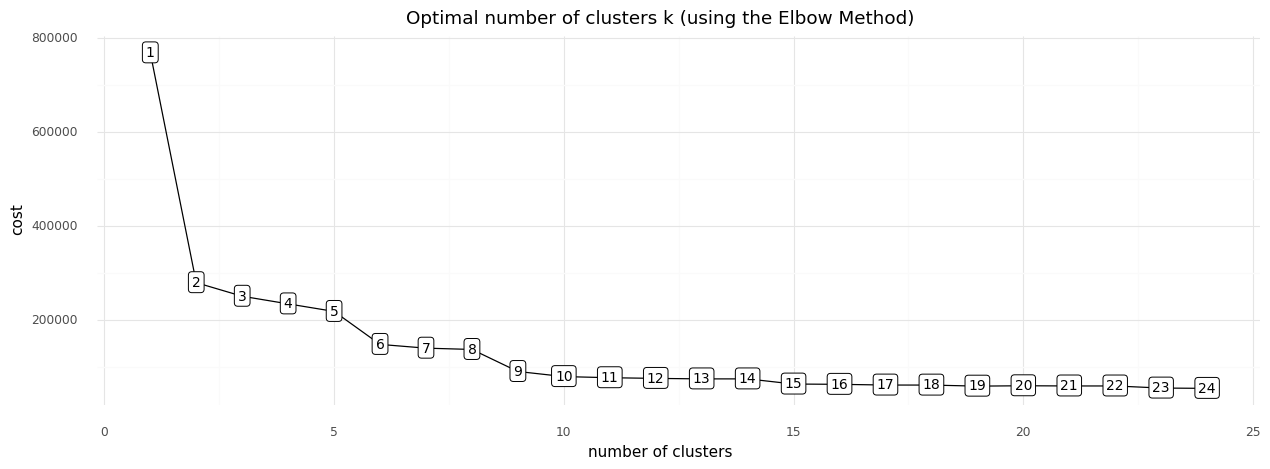

<ggplot: (8780890485390)>

In [21]:
# Import module for data visualization
from plotnine import *
import plotnine

plotnine.options.figure_size = (15, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

In [51]:
# Fit the cluster
OPTIMAL_K = 2

kmeans = computed_clusters[OPTIMAL_K]

In [52]:
# Cluster centorid
kmeans.cluster_centers_

array([[-1.02738278e+00, -7.87996569e-02,  4.01179834e-01,
        -3.46391689e-01,  1.64612049e-01, -4.09170824e-02,
        -1.50858109e-02,  2.13817922e-02,  6.87927388e-03,
         3.00930845e-02, -2.92048950e-02,  4.53397621e-03,
        -3.03491680e-03,  2.74021628e-03, -2.04800103e-03,
         8.28760572e-03, -2.09753701e-03,  1.80265583e-03,
         3.91862796e-03, -4.11494887e-03,  1.19402272e-03,
         3.23369965e-03,  1.15602833e-03,  4.61997376e-04,
         2.96934659e-04,  7.75773303e-03, -5.46227283e-03,
        -4.90243099e-03,  3.19155159e-03,  6.38568770e-04,
         9.39391728e-04, -1.55328736e-03, -2.49508606e-03,
         5.39913877e-04, -1.48710036e-04, -3.47863225e-04,
        -1.05426669e-04, -1.65346129e-04, -9.78512259e-04,
        -3.46628646e-04,  3.33668997e-04, -5.10828464e-04,
         2.02527317e-04,  8.95621900e-04,  6.93981880e-04,
        -2.64207183e-04, -1.03198276e-03, -1.15335433e-03,
         2.13421325e-05,  3.25821811e-04,  7.13517876e-0

In [53]:
# Check the iteration of the clusters created
kmeans.n_iter_

6

In [54]:
# Check the cost of the clusters created
kmeans.inertia_

250568.04055456028

In [55]:
# Add cluster labels to original dataframe
pca_X['cluster'] = kmeans.labels_
pca_X['cluster_cat'] = pca_X['cluster']

# (groupby works only on category type)
pca_X['cluster_cat'] = pca_X['cluster_cat'].astype('category')

In [56]:
pca_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,cluster,cluster_cat
0,-1.15142,-0.18160,0.28923,-0.04231,0.29754,-0.52954,-0.20237,0.12350,-0.04359,0.15546,-0.19505,0.04608,-0.00265,-0.01834,0.02408,0.06533,0.03174,-0.00612,-0.00843,-0.01262,0.01543,-0.00833,0.02348,-0.02256,-0.04224,0.03921,-0.03516,-0.03578,0.01640,-0.02920,0.00040,0.02064,0.02276,-0.00014,0.01059,0.00857,0.00817,-0.01339,-0.00827,-0.00041,0.00249,-0.00116,0.00541,0.00625,0.01308,-0.00471,-0.01203,-0.02027,-0.00346,-0.00336,0.00287,-0.00918,-0.00884,-0.00810,-0.00624,0.00717,-0.01319,-0.00596,-0.00183,-0.00600,0.00361,-0.00530,0.00302,-0.00364,0.00077,0.00055,0.00150,-0.00085,0.00171,-0.00975,0.00198,-0.01096,0.00447,-0.00250,-0.02632,0.00040,0.00649,0.00052,0.00514,-0.00373,-0.00562,0.00551,-0.00134,-0.00335,0.00080,-0.00089,-0.00145,0.00228,-0.00164,-0.00329,0.00131,-0.00048,0.00257,-0.00202,0.00112,0.00117,-0.00107,-0.00040,0.00018,0.00452,0.00015,0.00051,0.00265,0.00073,0.00005,0.00018,0.00103,0.00076,0.00089,0.00012,0.00072,-0.00045,-0.00019,0.00106,0.00036,0.00149,0.00143,-0.00238,-0.00003,-0.00072,0.00001,0.00030,-0.00010,-0.00012,0.00061,-0.00019,-0.00044,-0.00012,-0.00089,-0.00039,-0.00014,0.00028,0.00028,-0.00022,0.00007,-0.00015,0.00054,-0.00062,0.00009,0.00002,-0.00020,-0.00004,0.00019,0.00009,0.00052,-0.00002,0.00001,0.00007,-0.00011,0.00001,-0.00001,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0,0
1,4.41067,-1.87438,-0.64190,-0.42950,0.35313,-0.07034,0.02207,-0.48286,-0.73378,0.98809,0.56682,-0.66746,0.07140,-0.45830,-0.32989,0.01193,0.01649,-0.31478,-0.16300,0.29952,0.22165,0.08375,0.08280,0.01590,0.00449,0.04438,0.00539,-0.06026,0.00214,0.07903,0.04229,0.04449,-0.10380,-0.02077,-0.08153,-0.01466,-0.03158,-0.00497,-0.04602,0.01857,0.08106,-0.07612,0.03088,-0.12222,-0.07967,-0.00167,-0.01914,0.00301,-0.00103,0.00339,0.03169,0.01577,0.08138,-0.01522,-0.00906,-0.03340,-0.01477,-0.00973,-0.02061,-0.01127,-0.03530,0.03972,-0.01416,0.00306,0.00284,-0.01605,0.00697,-0.03870,0.00540,0.00947,-0.00274,0.01096,-0.01171,-0.00476,-0.01009,-0.02036,-0.02960,-0.01807,0.01962,-0.02623,-0.01290,0.00529,-0.01118,0.02270,-0.00310,-0.00111,-0.01875,-0.01286,0.00859,-0.02844,0.01765,0.00109,0.00151,0.01890,0.00073,0.00015,-0.00015,0.00424,-0.00325,0.00180,-0.00346,0.00033,0.00044,0.00309,-0.00121,-0.00151,0.00351,0.00171,0.00031,-0.00037,0.00185,-0.00250,-0.00227,0.00368,0.00051,-0.00105,0.00250,-0.00149,-0.00088,-0.00002,-0.00105,-0.00142,0.00546,-0.00149,-0.00072,-0.00328,-0.00267,-0.00026,0.00049,-0.00123,-0.00036,0.00224,0.00032,-0.00062,0.00038,-0.00019,0.00062,-0.00082,0.00012,-0.00032,-0.00096,0.00019,0.00080,-0.00012,0.00009,-0.00004,0.00005,0.00012,0.00008,-0.00001,0.00005,0.00001,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,

In [57]:
pca_X.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
                 194,           195,           196,           197,
                 198,           199,           200,           201,
           'cluster', 'cluster_cat'],
      dtype='object', length=204)

In [58]:
pca_X['cluster'].value_counts()

1    50029
0    45758
2    20469
Name: cluster, dtype: int64

## 3. Results

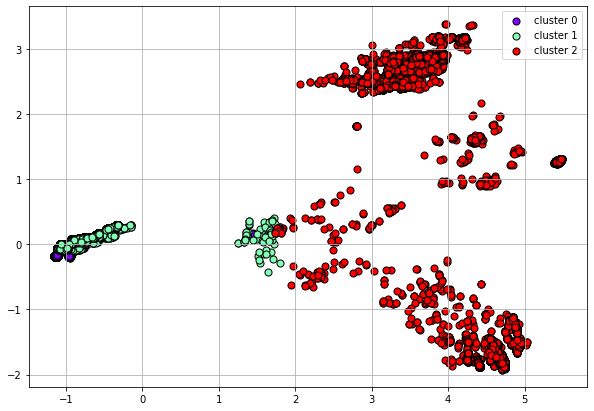

In [59]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)
# plt.rcParams["figure.figsize"] = (5.0,5.0) # https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

plt.rcParams["figure.figsize"] = (10,7)
colors = mcm.rainbow(np.linspace(0, 1, OPTIMAL_K + 1))

# plot the clusters
for i in range(OPTIMAL_K + 1):   
    plt.scatter(
        pca_X_array[kmeans.labels_ == i, 0], pca_X_array[kmeans.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [60]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[kmeans.labels_ == i, 0], 
                   pca_X_array[kmeans.labels_ == i, 1], 
                   pca_X_array[kmeans.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

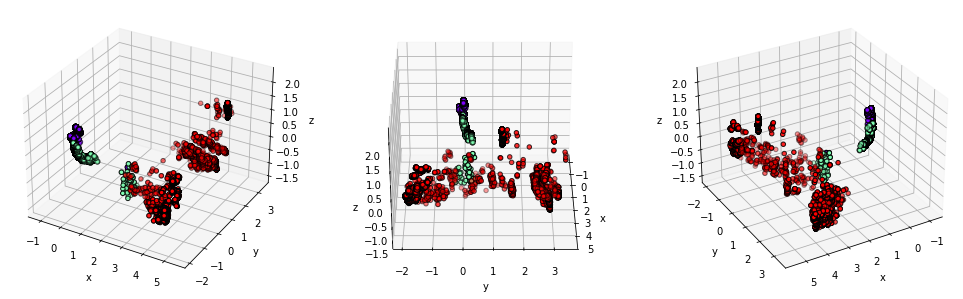

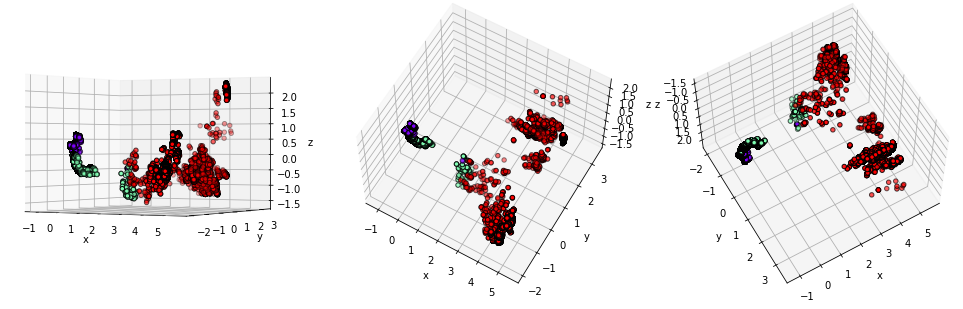

In [61]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [62]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [63]:
# Cluster interpretation

# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,cluster,cluster_cat,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
0,-1.15142,-0.18160,0.28923,-0.04231,0.29754,-0.52954,-0.20237,0.12350,-0.04359,0.15546,-0.19505,0.04608,-0.00265,-0.01834,0.02408,0.06533,0.03174,-0.00612,-0.00843,-0.01262,0.01543,-0.00833,0.02348,-0.02256,-0.04224,0.03921,-0.03516,-0.03578,0.01640,-0.02920,0.00040,0.02064,0.02276,-0.00014,0.01059,0.00857,0.00817,-0.01339,-0.00827,-0.00041,0.00249,-0.00116,0.00541,0.00625,0.01308,-0.00471,-0.01203,-0.02027,-0.00346,-0.00336,0.00287,-0.00918,-0.00884,-0.00810,-0.00624,0.00717,-0.01319,-0.00596,-0.00183,-0.00600,0.00361,-0.00530,0.00302,-0.00364,0.00077,0.00055,0.00150,-0.00085,0.00171,-0.00975,0.00198,-0.01096,0.00447,-0.00250,-0.02632,0.00040,0.00649,0.00052,0.00514,-0.00373,-0.00562,0.00551,-0.00134,-0.00335,0.00080,-0.00089,-0.00145,0.00228,-0.00164,-0.00329,0.00131,-0.00048,0.00257,-0.00202,0.00112,0.00117,-0.00107,-0.00040,0.00018,0.00452,0.00015,0.00051,0.00265,0.00073,0.00005,0.00018,0.00103,0.00076,0.00089,0.00012,0.00072,-0.00045,-0.00019,0.00106,0.00036,0.00149,0.00143,-0.00238,-0.00003,-0.00072,0.00001,0.00030,-0.00010,-0.00012,0.00061,-0.00019,-0.00044,-0.00012,-0.00089,-0.00039,-0.00014,0.00028,0.00028,-0.00022,0.00007,-0.00015,0.00054,-0.00062,0.00009,0.00002,-0.00020,-0.00004,0.00019,0.00009,0.00052,-0.00002,0.00001,0.00007,-0.00011,0.00001,-0.00001,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0,0,Cgby04iEgxumjcKz4,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:06:28.426709Z,0.38307,2.25496,0.00172,tcp,http,RSTO,0.78648,51540,orig_reg_or_dyn,0.00012,20,0.00454,8,0.00137,80,resp_80,0.00224,11595,0.00278,7,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
1,4.41067,-1.87438,-0.64190,-0.42950,0.35313,-0.07034,0.02207,-0.48286,-0.73378,0.98809,0.56682,-0.66746,0.07140,-0.45830,-0.32989,0.01193,0.01649,-0.31478,-0.16300,0.29952,0.22165,0.08375,0.08280,0.01590,0.00449,0.04438,0.00539,-0.06026,0.00214,0.07903,0.04229,0.04449,-0.10380,-0.02077,-0.08153,-0.01466,-0.03158,-0.00497,-0.04602,0.01857,0.08106,-0.07612,0.03088,-0.12222,-0.07967,-0.00167,-0.01914,0.00301,-0.00103,0.00339,0.03169,0.01577,0.08138,-0.01522,-0.00906,-0.03340,-0.01477,-0.00973,-0.02061,-0.01127,-0.03530,0.03972,-0.01416,0.00306,0.00284,-0.01605,0.00697,-0.03870,0.00540,0.00947,-0.00274,0.01096,-0.01171,-0.00476,-0.01009,-0.02036,-0.02960,-0.01807,0.01962,-0.02623,-0.01290,0.00529,-0.01118,0.02270,-0.00310,-0.00111,-0.01875,-0.01286,0.00859,-0.02844,0.01765,0.00109,0.00151,0.01890,0.00073,0.00015,-0.00015,0.00424,-0.003

In [65]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [66]:
print('Time:')
print_df_func(result, 'timestamp', 'min')
print_df_func(result, 'timestamp', 'max')

Time:
timestamp min = 2017-07-07T18:55:00.685029Z
timestamp max = 2017-07-07T19:24:56.015158Z



In [67]:
plt.rcParams["figure.figsize"] = (10,7)

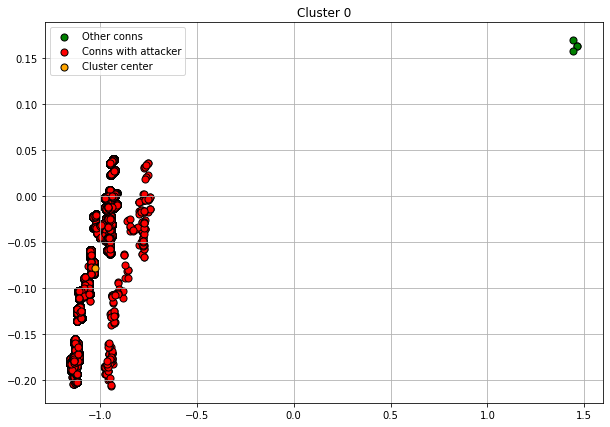

Total num of conns: 45758

Attacker conns ratio:
Yes    45754
No         4
Name: attacker_label, dtype: int64

IPs:
172.16.0.1       45754
192.168.10.14        2
192.168.10.8         2
Name: originated_ip, dtype: int64

192.168.10.50    45758
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-07T19:00:01.888675Z
timestamp max = 2017-07-07T19:09:18.223673Z

Cluster 0 NOK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
93053,CeKnJs4dhCua5raIq5,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:02:15.112866Z,0.24198,8.06684,0.00614,tcp,http,RSTO,0.89656,58754,orig_reg_or_dyn,0.00012,20,0.00567,10,0.00137,80,resp_80,0.00224,11595,0.00278,7,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
103819,CqoDlbxZPFmnCsxIa,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:02:47.285978Z,0.25990,11.95971,0.00911,tcp,http,RSTO,0.91004,59637,orig_reg_or_dyn,0.00012,20,0.00397,7,0.00137,80,resp_80,0.00224,11595,0.00159,4,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
43042,CKGTtk2lME2fnJAxg,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:04:28.692813Z,0.31638,7.26613,0.00553,tcp,http,RSTO,0.98624,64630,orig_reg_or_dyn,0.00012,20,0.00454,8,0.00137,80,resp_80,0.00224,11595,0.00239,6,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
17995,CuekOA31KMFZZFz2da,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:00:11.211442Z,0.17296,5.07497,0.00386,tcp,http,RSTO,0.87703,57474,orig_reg_or_dyn,0.00012,20,0.00454,8,0.00137,80,resp_80,0.00224,11595,0.00159,4,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
68970,CTql3N3Med4cjR96Je,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:05:26.277825Z,0.34846,1.93277,0.00147,tcp,http,RSTO,0.97224,63713,orig_reg_or_dyn,0.00012,20,0.00454,8,0.00137,80,resp_80,0.00224,11595,0.00278,7,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
92759,Cl5Pz2qj47C9aOb3b,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:00:50.773313Z,0.19500,9.21077,0.00701,tcp,http,RSTO,0.89426,58603,orig_reg_or_dyn,0.00012,20,0.00454,8,0.00137,80,resp_80,0.00224,11595,0.00159,4,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
60981,ClCg3a3t9OOth7o3a2,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:08:34.67034Z,0.45339,8.58314,0.00654,tcp,http,RSTO,0.47022,30816,orig_reg_or_dyn,0.00012,20,0.00397,7,0.00137,80,resp_80,0.00224,11595,0.00199,5,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
79960,Cggiqh1tOE9KIYaFOc,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:08:56.833504Z,0.46574,7.25782,0.00553,tcp,http,RSTO,0.81321,53292,orig_reg_or_dyn,0.00012,20,0.00397,7,0.00137,80,resp_80,0.00224,11595,0.00239,6,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
69798,C6eBaz1A5CNzZrjASj,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:09:14.233211Z,0.47543,3.87268,0.00295,tcp,http,RSTO,0.48655,31886,orig_reg_or_dyn,0.00012,20,0.00510,9,0.00137,80,resp_80,0.00224,11595,0.00278,7,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
62171,CojDug1rDuDgOrue51,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:05:06.256054Z,0.33730,3.90592,0.00297,tcp,http,RSTO,0.75209,49287,orig_reg_or_dyn,0.00012,20,0.00454,8,0.00137,80,resp_80,0.00224,11595,0.00278,7,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes


Cluster 0 OK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
91191,CH5BxF1XWGR2jXjq02,0.54203,192.168.10.14,0.85749,192.168.10.50,2017-07-07T19:02:25.045093Z,0.24751,0.13968,0.00011,tcp,ftp,SF,0.88561,58036,orig_reg_or_dyn,0.00052,88,0.01248,22,0.00035,21,resp_21,0.00004,219,0.01113,28,0.00000,0.00000,0.00000,0.00000,0.00000,No,Yes
78843,CYqW7v4SGZkmPiQ1f2,0.54203,192.168.10.8,0.85749,192.168.10.50,2017-07-07T19:02:11.101312Z,0.23974,1.56953,0.00120,tcp,ssh,SF,0.14652,9604,orig_reg_or_dyn,0.00771,1316,0.02155,38,0.00036,22,resp_22,0.00064,3317,0.01670,42,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
68590,C6wWl2234eipAwXMJf,0.54203,192.168.10.8,0.85749,192.168.10.50,2017-07-07T19:02:09.541301Z,0.23887,1.55947,0.00119,tcp,ssh,SF,0.14650,9603,orig_reg_or_dyn,0.00752,1284,0.02155,38,0.00036,22,resp_22,0.00067,3477,0.01750,44,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
12850,CeAZIG3Hua100idxZ9,0.54203,192.168.10.14,0.85749,192.168.10.50,2017-07-07T19:02:25.156177Z,0.24757,0.02789,0.00002,tcp,ftp-data,SF,0.88562,58037,orig_reg_or_dyn,0.06010,10257,0.01021,18,0.78037,45090,resp_reg,0.00000,0,0.00398,10,0.00000,0.00000,0.00000,0.00000,0.04348,No,Yes


Protocol:
tcp    45758
Name: protocol, dtype: int64

Service:
http        45494
none          260
ssh             2
ftp             1
ftp-data        1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    45758
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80     45754
resp_22         2
resp_21         1
resp_reg        1
Name: resp_p_cat, dtype: int64




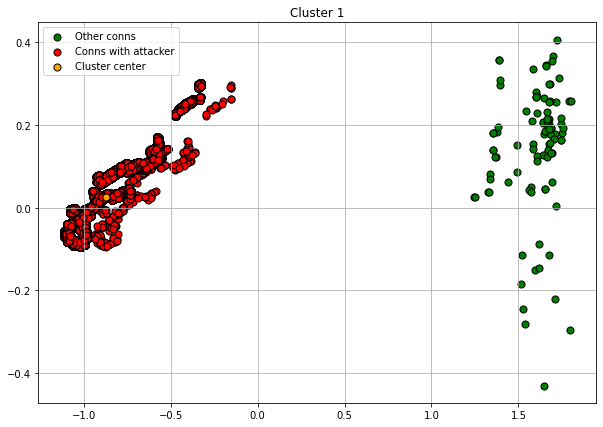

Total num of conns: 50029

Attacker conns ratio:
Yes    49944
No        85
Name: attacker_label, dtype: int64

IPs:
172.16.0.1       49944
192.168.10.16       13
192.168.10.14       12
192.168.10.8        12
192.168.10.25        9
192.168.10.17        8
192.168.10.9         8
192.168.10.12        7
192.168.10.15        6
192.168.10.5         6
192.168.10.19        4
Name: originated_ip, dtype: int64

192.168.10.50    50014
192.168.10.14        3
192.168.10.15        3
192.168.10.8         3
192.168.10.5         3
192.168.10.9         3
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-07T18:55:22.223121Z
timestamp max = 2017-07-07T19:20:38.410097Z

Cluster 1 NOK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
90113,CGtRtS37FswvwCKQL7,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T18:59:23.028273Z,0.14613,9.24528,0.00704,tcp,http,RSTO,0.82599,54129,orig_reg_or_dyn,0.00012,20,0.00397,7,0.00137,80,resp_80,0.00224,11595,0.00199,5,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
17174,C6ABHO2G8CJZup8wNi,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:13:35.065318Z,0.62071,11.12395,0.00847,tcp,http,RSTO,0.96858,63473,orig_reg_or_dyn,0.00012,20,0.00510,9,0.00137,80,resp_80,0.00224,11595,0.00239,6,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
1171,CL1UYR2iDCVarkKMLl,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T18:58:17.016697Z,0.10936,6.72081,0.00512,tcp,http,RSTO,0.79841,52322,orig_reg_or_dyn,0.00012,20,0.00454,8,0.00137,80,resp_80,0.00224,11595,0.00159,4,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
14072,CSvuhH1Hpbazcg39rc,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T18:57:49.665434Z,0.09412,10.49771,0.00799,tcp,http,RSTO,0.81703,53542,orig_reg_or_dyn,0.00012,20,0.00397,7,0.00137,80,resp_80,0.00224,11595,0.00199,5,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
82395,CNP8CDQc9VeNXRDmf,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:12:20.440717Z,0.57914,3.99393,0.00304,tcp,http,RSTO,0.93676,61388,orig_reg_or_dyn,0.00012,20,0.00510,9,0.00137,80,resp_80,0.00224,11595,0.00159,4,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
9365,CJZxDK2HdarZFx90qf,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:12:44.600042Z,0.59260,12.22333,0.00931,tcp,http,RSTO,0.90601,59373,orig_reg_or_dyn,0.00012,20,0.00510,9,0.00137,80,resp_80,0.00224,11595,0.00239,6,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
75670,CkepTY11PT56eGwD7d,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:14:12.631255Z,0.64163,3.03229,0.00231,tcp,http,RSTO,0.61063,40017,orig_reg_or_dyn,0.00012,20,0.00454,8,0.00137,80,resp_80,0.00224,11595,0.00239,6,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
93201,C7oNwW3nJKNgZvleEg,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:15:56.397081Z,0.69943,3.90038,0.00297,tcp,http,RSTO,0.65319,42806,orig_reg_or_dyn,0.00012,20,0.00397,7,0.00137,80,resp_80,0.00224,11595,0.00199,5,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
71234,C5OyDk1B7CDILIQuPc,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:09:38.941311Z,0.48919,3.23993,0.00247,tcp,http,RSTO,0.86806,56886,orig_reg_or_dyn,0.00012,20,0.00454,8,0.00137,80,resp_80,0.00224,11595,0.00159,4,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
98205,ChR2QV36VV834FfGDa,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:09:52.098892Z,0.49652,7.69329,0.00586,tcp,http,RSTO,0.83551,54753,orig_reg_or_dyn,0.00012,20,0.00510,9,0.00137,80,resp_80,0.00224,11595,0.00239,6,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes


Cluster 1 OK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
14631,CZth0kYYQggT1IVmg,0.54203,192.168.10.25,0.85749,192.168.10.50,2017-07-07T19:00:03.78446Z,0.16883,0.03770,0.00003,tcp,ftp-data,SF,0.81839,53631,orig_reg_or_dyn,0.06010,10257,0.01588,28,0.36133,20878,resp_reg,0.00000,0,0.00954,24,0.00000,0.00000,0.00000,0.00000,0.04348,No,Yes
105505,CAW2H94reagWJUtTb,0.54203,192.168.10.17,0.85749,192.168.10.50,2017-07-07T19:07:40.395363Z,0.42316,0.14358,0.00011,tcp,ftp,SF,0.72093,47245,orig_reg_or_dyn,0.00052,88,0.01248,22,0.00035,21,resp_21,0.00004,219,0.01113,28,0.00000,0.00000,0.00000,0.00000,0.00000,No,Yes
66214,C6vo2iP61S6z3tHL5,0.54203,192.168.10.16,0.85749,192.168.10.50,2017-07-07T19:06:34.651666Z,0.38654,0.00011,0.00000,tcp,none,OTH,0.73731,48318,orig_reg_or_dyn,0.00000,0,0.00113,2,0.00239,139,resp_well_known,0.00000,4,0.00080,2,0.00000,0.00000,0.00000,0.00000,0.00000,No,Yes
75636,C6JyS93S80JSTXEk49,0.54203,192.168.10.5,0.85749,192.168.10.50,2017-07-07T19:14:17.398304Z,0.64429,1.31221,0.00100,tcp,ssh,SF,0.85715,56171,orig_reg_or_dyn,0.00771,1316,0.02155,38,0.00036,22,resp_22,0.00064,3317,0.01670,42,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
45611,C8ni5I3tP6IZRrGiN4,0.54203,192.168.10.15,0.85749,192.168.10.50,2017-07-07T18:59:10.980407Z,0.13941,1.46598,0.00112,tcp,ssh,SF,0.89920,58927,orig_reg_or_dyn,0.00752,1284,0.02382,42,0.00036,22,resp_22,0.00067,3477,0.01909,48,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
5706,C381zdqRlSFLzx5ki,0.54203,192.168.10.12,0.85749,192.168.10.50,2017-07-07T19:05:35.44011Z,0.35356,0.00007,0.00000,tcp,none,OTH,0.60311,39524,orig_reg_or_dyn,0.00000,0,0.00113,2,0.00239,139,resp_well_known,0.00000,4,0.00080,2,0.00000,0.00000,0.00000,0.00000,0.00000,No,Yes
50022,Cf4dON3MJeR10zhhX2,0.54203,192.168.10.17,0.85749,192.168.10.50,2017-07-07T18:59:24.124772Z,0.14674,1.37554,0.00105,tcp,ssh,SF,0.56935,37312,orig_reg_or_dyn,0.00799,1364,0.02496,44,0.00036,22,resp_22,0.00064,3317,0.01750,44,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
60864,CRGnGe4kM4t5NmU8if,0.54203,192.168.10.16,0.85749,192.168.10.50,2017-07-07T19:10:53.107963Z,0.53050,0.01323,0.00001,tcp,ftp-data,SF,0.69168,45328,orig_reg_or_dyn,0.06010,10257,0.01078,19,0.11636,6724,resp_reg,0.00000,0,0.00398,10,0.00000,0.00000,0.00000,0.00000,0.04348,No,Yes
114565,CX0nQx27jr2NvUF7fc,0.54203,192.168.10.8,0.85749,192.168.10.50,2017-07-07T19:05:44.748595Z,0.35874,0.14641,0.00011,tcp,ftp,SF,0.14684,9625,orig_reg_or_dyn,0.00052,88,0.01248,22,0.00035,21,resp_21,0.00004,220,0.01113,28,0.00000,0.00000,0.00000,0.00000,0.00000,No,Yes
18901,Cj838i1zrmENUOLi5e,0.54203,192.168.10.15,0.85749,192.168.10.50,2017-07-07T19:12:49.916872Z,0.59556,0.03459,0.00003,tcp,ftp-data,SF,0.90726,59455,orig_reg_or_dyn,0.06010,10257,0.01134,20,0.21579,12469,resp_reg,0.00000,0,0.00398,10,0.00000,0.00000,0.00000,0.00000,0.04348,No,Yes


Protocol:
tcp     50014
icmp       15
Name: protocol, dtype: int64

Service:
http                  49640
none                    312
ssh                      42
ftp                      15
ftp-data                 15
dce_rpc,gssapi,smb        5
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    50014
orig_well_known       15
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80            49929
resp_22               42
resp_well_known       28
resp_21               15
resp_reg              13
resp_dyn               2
Name: resp_p_cat, dtype: int64




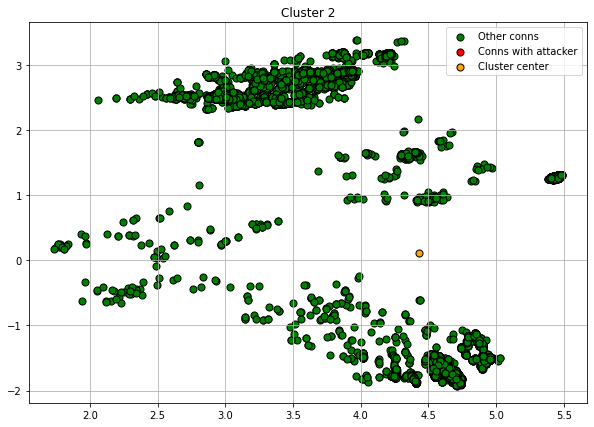

Total num of conns: 20469

Attacker conns ratio:
No     20459
Yes       10
Name: attacker_label, dtype: int64

IPs:
192.168.10.12    6175
192.168.10.3     3424
192.168.10.15    2771
192.168.10.16    1801
192.168.10.14    1582
192.168.10.9     1481
192.168.10.5      970
192.168.10.17     690
192.168.10.8      668
192.168.10.50     313
192.168.10.19     265
192.168.10.25     233
192.168.10.51      85
172.16.0.1         10
210.14.132.70       1
Name: originated_ip, dtype: int64

192.168.10.3       11011
192.168.10.1        3397
61.251.165.12        531
205.174.165.73       320
23.111.11.111        155
                   ...  
151.101.21.181         1
54.236.72.117          1
206.126.112.145        1
173.194.66.157         1
162.247.242.20         1
Name: responded_ip, Length: 1136, dtype: int64

Time:
timestamp min = 2017-07-07T18:55:00.685029Z
timestamp max = 2017-07-07T19:24:56.015158Z

Cluster 2 OK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
19188,Cle8B3kotRakyOiCi,0.54203,192.168.10.3,0.85749,192.168.10.1,2017-07-07T18:56:21.623986Z,0.04508,0.07029,0.00005,udp,dns,SF,0.94953,62225,orig_reg_or_dyn,0.00033,56,0.00057,1,0.00090,53,resp_53,0.00003,141,0.00040,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
55552,CLb8Bl1tuqkfieqwL8,0.54203,192.168.10.25,0.76742,172.217.10.46,2017-07-07T19:24:01.666923Z,0.96973,30.03543,0.02287,tcp,ssl,SF,0.81994,53733,orig_reg_or_dyn,0.00731,1248,0.01305,23,0.00765,443,resp_443,0.00319,16494,0.00716,18,0.00000,0.00000,0.00000,1.00000,0.13043,No,No
7930,CNmxEL1Jj9jCEo803j,0.54203,192.168.10.12,0.85749,192.168.10.3,2017-07-07T19:11:33.609603Z,0.55306,0.00025,0.00000,udp,dns,SF,0.70987,46520,orig_reg_or_dyn,0.00038,64,0.00113,2,0.00090,53,resp_53,0.00005,258,0.00080,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
756,CLhTKHOD0EfFE2AMk,0.54203,192.168.10.9,0.23106,54.225.186.185,2017-07-07T19:16:07.210897Z,0.70546,0.49870,0.00038,tcp,ssl,SF,0.14977,9817,orig_reg_or_dyn,0.00702,1198,0.00454,8,0.00765,443,resp_443,0.00097,5028,0.00318,8,0.00000,0.00000,0.00000,1.00000,0.13043,No,No
25674,CUufkg2mOk54tyJ4Ak,0.54203,192.168.10.12,0.85749,192.168.10.3,2017-07-07T19:13:35.839355Z,0.62114,0.00021,0.00000,udp,dns,SF,0.66017,43263,orig_reg_or_dyn,0.00038,64,0.00113,2,0.00090,53,resp_53,0.00005,258,0.00080,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
10042,C2isEqhLN9SNTjjNe,0.54203,192.168.10.12,0.85749,192.168.10.3,2017-07-07T19:03:16.731081Z,0.27630,0.00025,0.00000,udp,dns,SF,0.69153,45318,orig_reg_or_dyn,0.00041,70,0.00113,2,0.00090,53,resp_53,0.00003,168,0.00080,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
37916,CukeF84SNu3I50nP32,0.54203,192.168.10.19,0.85749,192.168.10.3,2017-07-07T19:01:38.248831Z,0.22144,0.00042,0.00000,udp,dns,SF,0.71794,47049,orig_reg_or_dyn,0.00045,76,0.00113,2,0.00090,53,resp_53,0.00002,108,0.00080,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
111354,C215yj3kvKCaXUzBLl,0.54203,192.168.10.3,0.85749,192.168.10.1,2017-07-07T19:13:47.802122Z,0.62780,0.02357,0.00002,udp,dns,SF,0.93878,61520,orig_reg_or_dyn,0.00034,58,0.00057,1,0.00090,53,resp_53,0.00002,90,0.00040,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
109810,CKTig93yRhYnCnVA4i,0.54203,192.168.10.3,0.85749,192.168.10.1,2017-07-07T19:13:41.581071Z,0.62434,0.07081,0.00005,udp,dns,SF,0.95339,62478,orig_reg_or_dyn,0.00026,44,0.00057,1,0.00090,53,resp_53,0.00001,60,0.00040,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
10663,C6uplG2ibxOj6MQOdi,0.54203,192.168.10.12,0.85749,192.168.10.3,2017-07-07T18:59:12.78219Z,0.14042,0.00024,0.00000,udp,dns,SF,0.30477,19974,orig_reg_or_dyn,0.00041,70,0.00113,2,0.00090,53,resp_53,0.00003,168,0.00080,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp     14566
tcp      5892
icmp       11
Name: protocol, dtype: int64

Service:
dns                   14377
ssl                    2942
http                   1910
none                    997
ntp                     126
ssh                      36
krb                      19
ftp                      13
ftp-data                 13
krb,gssapi,smb           10
dce_rpc                  10
krb_tcp                   9
dce_rpc,gssapi,smb        5
ntlm,gssapi,smb           2
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    20227
orig_well_known      242
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            14260
resp_443            2986
resp_80             2402
resp_reg             357
resp_well_known      280
resp_123             126
resp_22               36
resp_21               13
resp_dyn               9
Name: resp_p_cat, dtype: int64




In [68]:
for i in range(OPTIMAL_K + 1):
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.scatter(
        kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='Cluster center'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')
    
    print('Time:')
    print_df_func(result_cluster, 'timestamp', 'min')
    print_df_func(result_cluster, 'timestamp', 'max')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

## Evaluation

**Rand index** *can't be used, requires labels.. (https://scikit-learn.org/stable/modules/clustering.html#rand-index)*


Notation: set `S = {1, 2, .. n}` of `x > 2` points, distance function `d(i,j)` measures distance between 2 points from S (d can be Euclidean, Manhattan, Chebyshev, Mahalanobis, .. alternatively similarity function can be used)


#### 3 axioms of Jon Kleinberg: 

- characteristics that a grouping problem shuld exhibit and can be considered "good", independently of alg used to find solution

1. **scale invariance**: `f(d) == f(alfa*d)` for any d and alfa > 0

2. **consistency**: if for every (i,j) from same cluster `d(i,j) >= d'(i,j)` and from different clusters `d(i,j) < d'(i,j)` then `f(d) == f(d')`

3. **wealth, richness**: every partition of S is a possible result of the clustering process

For every n >= 2 there is no clustering alg. that satysfies all three at once. 

2 measure of internal metrics: 

**cohesion** = between points in same cluster

**separation** = between points from different clusters



### Sum of Squared Error (SSE) 

(https://stackoverflow.com/questions/43784903/scikit-k-means-clustering-performance-measure)

Elbow Criterion 

- not available as a function in Scikit (we need to calculate SSE to evaluate K-Means using Elbow Criterion)

**Idea of Elbow Criterion method: choose `k` (number of cluster) at which the SSE decreases abruptly.**

(Small values indicate good quality.)

SSE = sum of squared distance between each member of the cluster and its centroid

SSE tends to decrease toward 0 as we increase k (SSE=0, when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).

=> goal: choose a small value of k that still has a low SSE, and the elbow usually represents, where we start to have diminishing returns by increasing k

If the line graph looks like an arm, the "elbow" on the arm is the value of optimal k (number of cluster). 

## Metrics that quantify level of separation and cohesion in a single measure:

### Silhouette Score

- used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other
- is calculated for each sample of different clusters
- to calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a. Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

Silhouette score, S, for each sample is calculated using the following formula:

```
Silhouette Score = (average intra-cluster distance - average inter-cluster distance) / 
                   max(average inter-cluster distance, average intra-cluster distance)

```

- intra-cluster distance = average distance between each point within a cluster
- inter-cluster distance = average distance between all clusters

Value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

Single pass eval:

In [40]:
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics

sse = {}
sil = {}
ch = {}
db = {}

from sklearn.cluster import KMeans
from sklearn import metrics

for k in range(2, len(computed_clusters)):
# for k in range(OPTIMAL_K, OPTIMAL_K + 1):
    print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
    
    km = computed_clusters[k]
    km_fit = computed_clusters_fitted[k]
    
    print('K=' + str(k + 1) + ' clusters: ')
    
    sse_score = km_fit.inertia_   
    sse[k] = sse_score
    print('Sum of Squared Error for k = ' + str(k + 1) + ': ' + str(sse_score))
    
    ch_score = metrics.calinski_harabasz_score(pca_X, km_fit.labels_)
    ch[k] = ch_score
    print('Calisnki-Harabasz Coefficient for k = ' + str(k + 1) + ': ' + str(ch_score))
    
    db_score = davies_bouldin_score(pca_X, km_fit.labels_)
    db[k] = db_score
    print('Davies-Bouldin Index for k = ' + str(k + 1) + ': ' + str(db_score))
    
    sil_score = metrics.silhouette_score(pca_X, km.labels_, metric='euclidean')
    sil[k] = sil_score
    print('Silhouette Score for k = ' + str(k + 1) + ': ' + str(sil_score))
    
    print('End at ' + datetime.now().strftime("%H:%M:%S") + '.')
    
    print('--')

Start at 01:05:28.
K=3 clusters: 
Sum of Squared Error for k = 3: 250568.04055456028
Calisnki-Harabasz Coefficient for k = 3: 202057.50787294479
Davies-Bouldin Index for k = 3: 0.6410633253501591
Silhouette Score for k = 3: 0.6517643827838899
End at 01:08:41.
--
Start at 01:08:41.
K=4 clusters: 
Sum of Squared Error for k = 4: 234315.88774027635
Calisnki-Harabasz Coefficient for k = 4: 160791.7592865621
Davies-Bouldin Index for k = 4: 0.6482362266271633
Silhouette Score for k = 4: 0.611636050472267
End at 01:11:51.
--
Start at 01:11:51.
K=5 clusters: 
Sum of Squared Error for k = 5: 218258.99365632274
Calisnki-Harabasz Coefficient for k = 5: 144749.4925500583
Davies-Bouldin Index for k = 5: 0.9391602951598292
Silhouette Score for k = 5: 0.6052899511278452
End at 01:15:02.
--
Start at 01:15:02.
K=6 clusters: 
Sum of Squared Error for k = 6: 148042.84072734546
Calisnki-Harabasz Coefficient for k = 6: 77647.5099004027
Davies-Bouldin Index for k = 6: 1.2062582084662647
Silhouette Score for

In [41]:
sse

{2: 250568.04055456028,
 3: 234315.88774027635,
 4: 218258.99365632274,
 5: 148042.84072734546,
 6: 140057.53259649503,
 7: 137285.21819205544,
 8: 90393.95028297292,
 9: 79557.02452695074,
 10: 77140.74157079236,
 11: 75685.8533223417,
 12: 74630.59387619537,
 13: 74645.26710929169,
 14: 63681.838943554845,
 15: 63043.02723131618,
 16: 61535.10826496309,
 17: 61454.983353746036,
 18: 59204.57618595188,
 19: 60019.35214675205,
 20: 59582.82029195058,
 21: 59559.278005469154,
 22: 55120.61503659871,
 23: 54453.543338340554}

In [42]:
ch

{2: 202057.50787294479,
 3: 160791.7592865621,
 4: 144749.4925500583,
 5: 77647.5099004027,
 6: 135774.4266315221,
 7: 107442.5157405514,
 8: 134396.67718098674,
 9: 146641.14849058044,
 10: 139062.97158323097,
 11: 128254.02790448983,
 12: 91297.0437738876,
 13: 109499.65599148312,
 14: 116317.2947716985,
 15: 109422.54653043133,
 16: 104535.58803421767,
 17: 98485.08073376062,
 18: 94790.69050223616,
 19: 107938.39643669198,
 20: 96478.05658336094,
 21: 91914.00686860144,
 22: 104155.37339988825,
 23: 100754.28206699109}

In [43]:
db

{2: 0.6410633253501591,
 3: 0.6482362266271633,
 4: 0.9391602951598292,
 5: 1.2062582084662647,
 6: 0.830342572228144,
 7: 1.0186754259620712,
 8: 0.939072056034316,
 9: 0.8865252666991221,
 10: 0.9111316845497952,
 11: 0.9428868886149738,
 12: 1.060752725536403,
 13: 1.120614223646206,
 14: 1.1764067165977292,
 15: 1.1336560339487414,
 16: 1.128401643665073,
 17: 1.1352231198216702,
 18: 1.2103638043312748,
 19: 1.115773954966071,
 20: 1.207455126594853,
 21: 1.1860233098975124,
 22: 1.1354120507351708,
 23: 1.1357687981544355}

In [44]:
sil

{2: 0.6517643827838899,
 3: 0.611636050472267,
 4: 0.6052899511278452,
 5: 0.3177300061156024,
 6: 0.5433210783361454,
 7: 0.4878077410625725,
 8: 0.5031055960701367,
 9: 0.5116893840677857,
 10: 0.4784217332969326,
 11: 0.4703465945354399,
 12: 0.4034023512637209,
 13: 0.40712382896884786,
 14: 0.4075380419896194,
 15: 0.415876544428795,
 16: 0.4060178587995684,
 17: 0.3885742590175376,
 18: 0.3914528042774641,
 19: 0.43257923989407,
 20: 0.4167474221803372,
 21: 0.4113809409001813,
 22: 0.4154637356603428,
 23: 0.42080687511652737}

In [45]:
# 1: clusters are clearly distinguished
# 0: distance between clusters is not significant ('data are uniformly distributed throughout Euclidean space')
# -1: clusters are assigned the wrong way

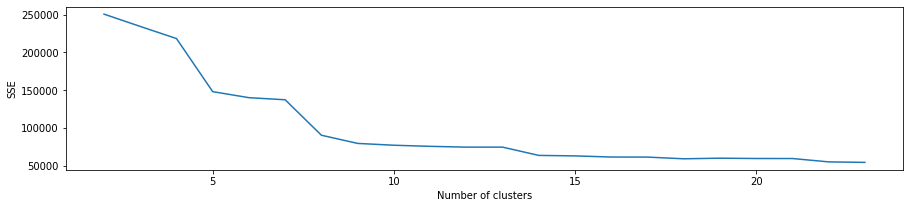

In [46]:
# import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,3)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [47]:
# plt.rcParams["figure.figsize"] = (15,3)
# plt.figure()
# sse_to_10 = { k: v for k, v in sse.items() if k <= 10 }  # zoom in
# plt.plot(list(sse_to_10.keys()), list(sse_to_10.values()))
# plt.xlabel("Number of clusters")
# plt.ylabel("SSE")
# plt.show()

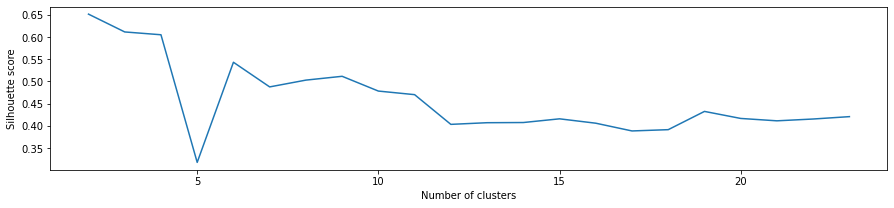

In [48]:
plt.rcParams["figure.figsize"] = (15,3)
plt.figure()
plt.plot(list(sil.keys()), list(sil.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

## Interpretation

Parallel coordinates plots.

In [69]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

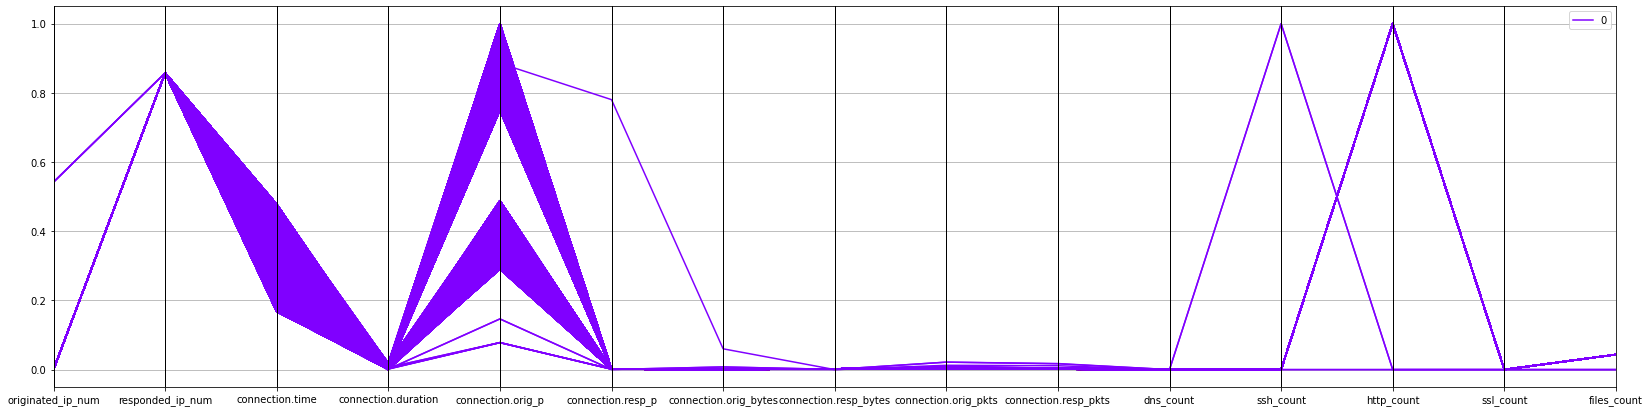

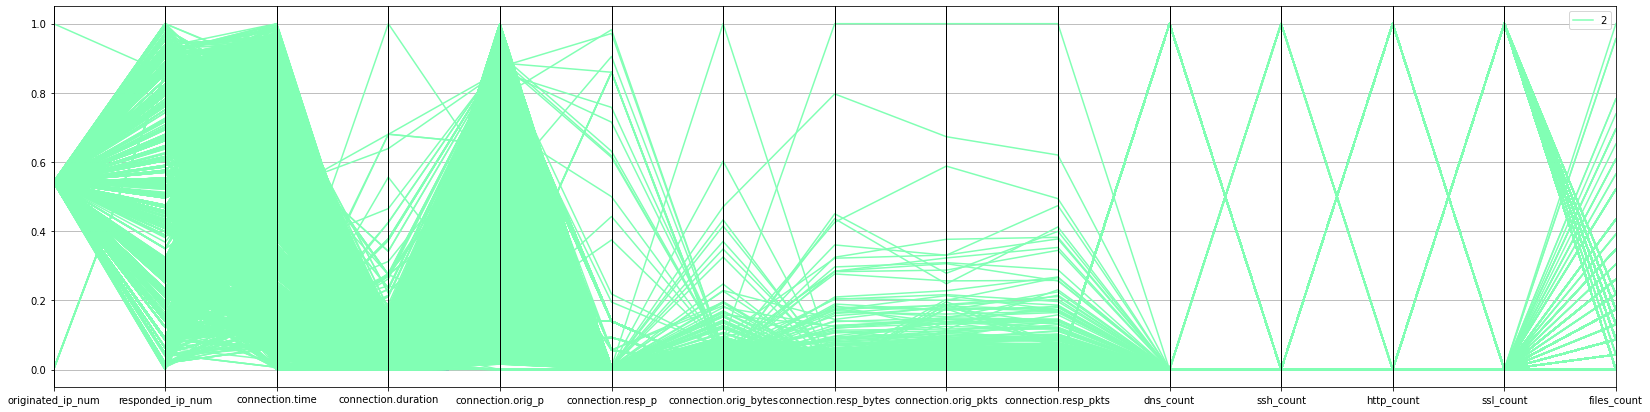

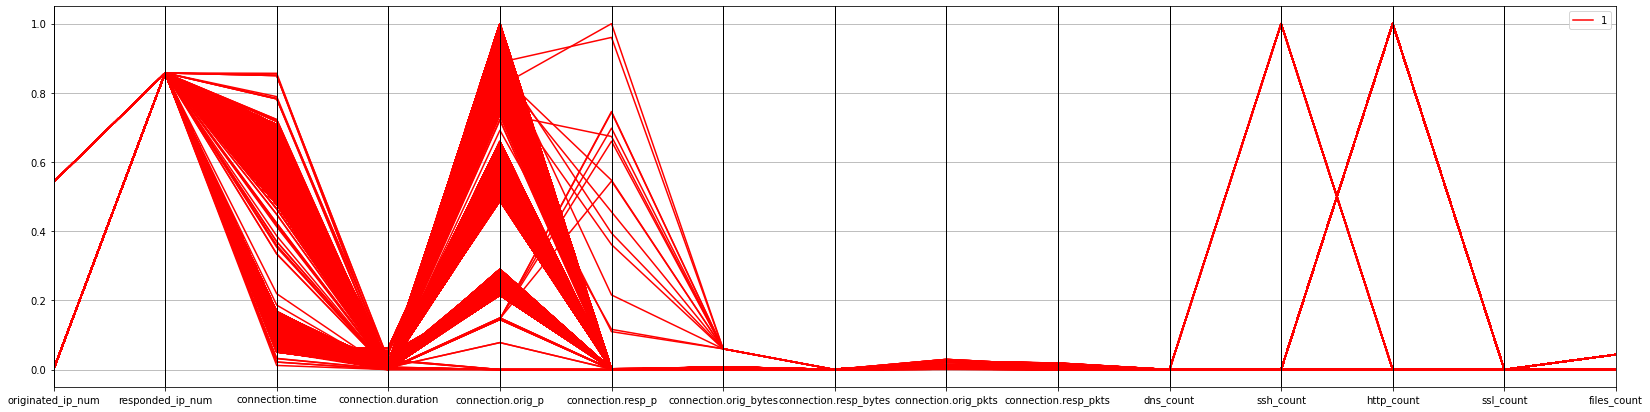

In [70]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

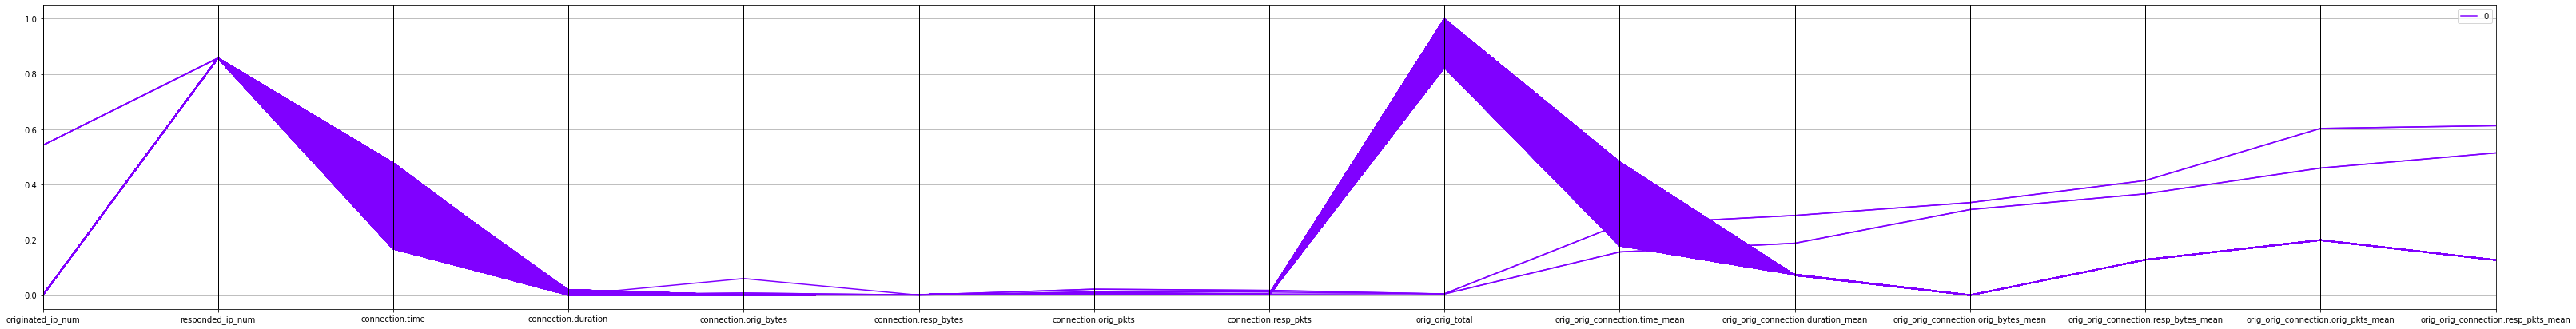

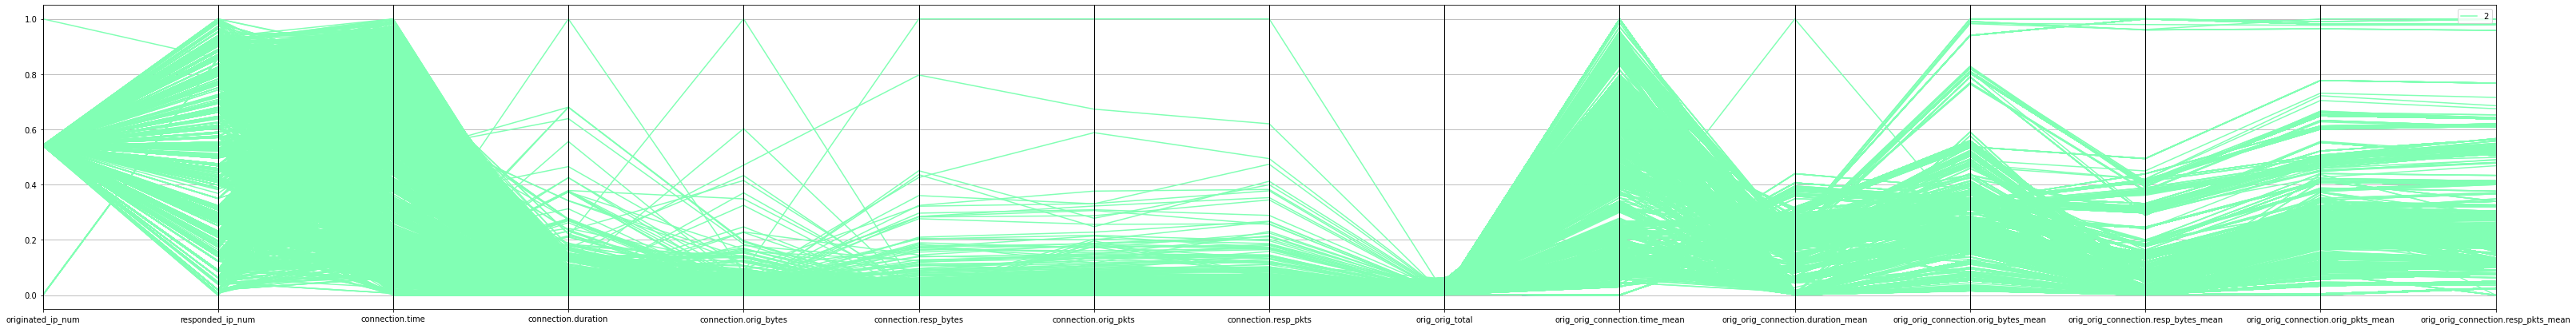

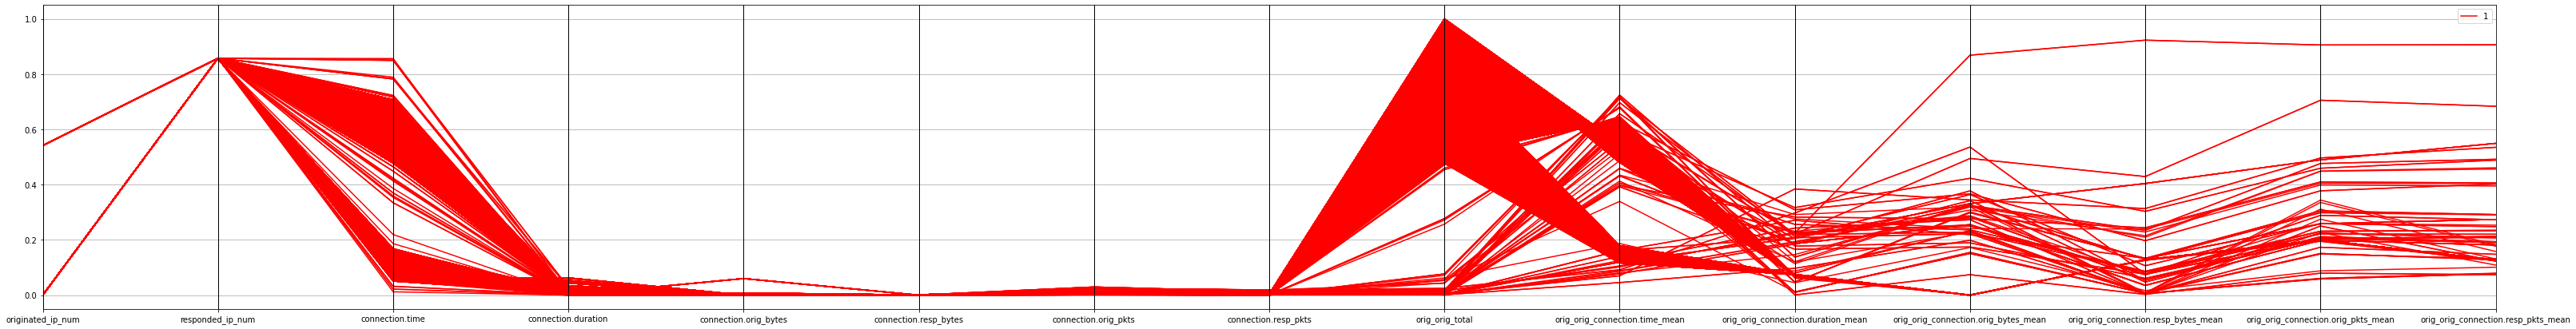

In [71]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()